Here we roughly reproduce the results of the paper
[Classical Simulation of Quantum Supremacy Circuits - Huang et al.](https://scirate.com/arxiv/2005.06787). 
There are of course many practical aspects of actually performing the contraction that we ignore here,
instead just investigating the contraction complexity of the core task of computing a single marginal
probability distribution of 6 qubits (which is sufficient, due to the circuit's chaotic nature,
to sample a single bitstring in a pretty much unbiased manner).

In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn
import cotengra as ctg

Load the circuit:

In [2]:
circ = qtn.Circuit.from_qasm_file('circuit_n53_m20_s0_e0_pABCDCDAB.qsim')

Instantiate a path optimizer:

In [3]:
opt = ctg.HyperOptimizer(
    slicing_reconf_opts={'target_size': 2**29},  # dynamically slice to W=29
    max_repeats=1000,  # sample 1000 contraction trees
    parallel='ray', progbar=True,
)

2021-03-08 18:41:44,562	INFO services.py:1090 -- View the Ray dashboard at http://127.0.0.1:8266


Rehearse contracting a 6 qubit marginal ([see quimb](https://quimb.readthedocs.io/en/latest/tensor-circuit.html#Generate-samples-from-a-chaotic-circuit)):

In [4]:
marginal_qubits = circ.calc_qubit_ordering()[-6:]

# choice of marginal qubits from the paper
# marginal_qubits = (10, 17, 26, 36, 27, 18)

# other potential choices:
# marginal_qubits = circ.calc_qubit_ordering()[:6]

In [5]:
rehs = circ.sample_chaotic_rehearse(marginal_qubits, optimize=opt)

log2[SIZE]: 29.00 log10[FLOPs]: 19.03: 100%|██████████| 1000/1000 [3:15:19<00:00, 11.72s/it] 


Retrieve the (dynamically sliced) contraction tree:

In [6]:
tree = opt.get_tree()

Check the contraction cost / time complexity (n.b. this is half what's displayed
above as in units not specific to real dtypes):

In [7]:
f'{tree.contraction_cost():e}'

'5.330128e+18'

In the paper the total time complexity is reported as $6.66 \times 10^{18}$, so, 
practical efficiency considerations aside (which are not trivial!) this is 
very similar.

In [8]:
len(tree.sliced_inds)

24

We can also look at the optimizer progression:

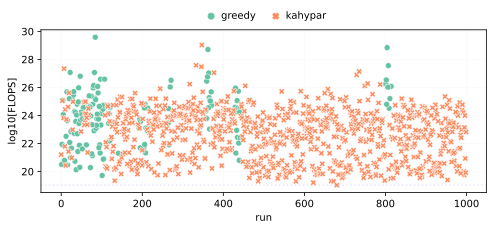

In [9]:
opt.plot_trials('flops')

And visualize the actual contraction tree:

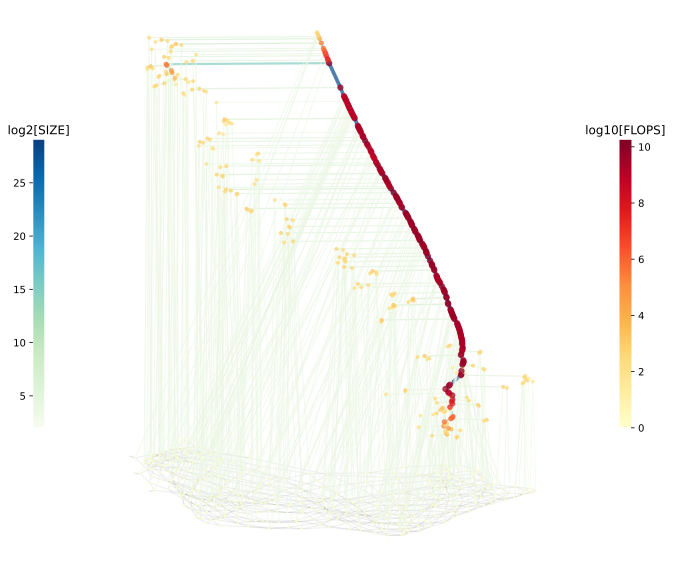

In [10]:
tree.plot_tent(order=True, figsize=(8, 8))